# MAC0460
## Notebook 1 -- Perceptron: toy example

### Definição de algumas funções auxiliares.

Dada uma função linear $\mathbf{w}^T \mathbf{x}$ com $\mathbf{w} \in \mathbb{R}^3$ e $\mathbf{x} \in \mathbb{R}^{1+2}$ (isto é, $\mathbf{x} = (1, x_1, x_2)$),
- calcular o seu valor em um ponto $\mathbf{x}$ dado
- gerar um conjunto de pontos $(x_1,x_2)$ que estejam na reta $\mathbf{w}^T\mathbf{x} = 0$ (isto é feito amostrando-se o eixo $x_1$ de $dx$ em $dx$)
- calcular o sinal de um número (usado depois para calcular o sinal da função $h(\mathbf{x})=\mathbf{w}^T\mathbf{x}$ para um dado $\mathbf{x}$)

Os intervalos nos eixos $x_1$ e $x_2$ estão hard-coded ... podem ser parametrizados.

In [1]:
import numpy as np

# calcula o valor da função w^T x, para um dado w e x
def valor_da_f(w, x):
    return(w.dot(x))
    
    
# calcula x2 tal que h(x) = w^T x = 0, x_1=-0.5,dx,2dx,...,1.5  (intervalo [-0.5,1.5])
def pontos_na_reta(w,dx):
    X1 = []
    X2 = []
    if w[2] != 0:
        x1 = -0.5
        while x1 <= 1.5:
            x2 = -(w[0] + w[1]*x1) / w[2]
            X1.append(x1)
            X2.append(x2)
            x1 = x1+dx
        return X1, X2
    else:  # supondo que w1 != 0
        x2 = -0.5
        while x2 <= 1.5: 
            X1.append(-w0/w1)
            X2.append(x2)
        return X1, X2
    
# devolve +1 se v é > 0 e -1 em caso contrário
def sign_da_f( v ):
    if (v > 0):
        return 1
    else:
        return -1

### Pontos e uma target function
- dataset consistirá dos quatro vértices do quadrado unitário
- definir uma reta $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$ que corta o quadrado $[0,1]\times [0,1]$
- plotar esses pontos de tal forma que pontos $(x_1,x_2)$ tais que $f(x_1,x_2) > 0$ (<font color="blue">positivo</font>) são plotados em <font color="blue">azul</font> e pontos $(x_1,x_2)$ tais que $f(x_1,x_2) < 0$ (<font color="red">negativo</font>) são plotados em <font color="red">vermelho</font>

(4, 2)
(4, 3)
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
x1:  [-0.5, -0.4, -0.30000000000000004, -0.20000000000000004, -0.10000000000000003, -2.7755575615628914e-17, 0.09999999999999998, 0.19999999999999998, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001]  e x2:  [-1.0, -0.9, -0.8, -0.7000000000000001, -0.6000000000000001, -0.5, -0.4, -0.30000000000000004, -0.2, -0.09999999999999998, -0.0, 0.09999999999999998, 0.19999999999999996, 0.29999999999999993, 0.3999999999999999, 0.4999999999999999, 0.5999999999999999, 0.7, 0.8, 0.9000000000000001]


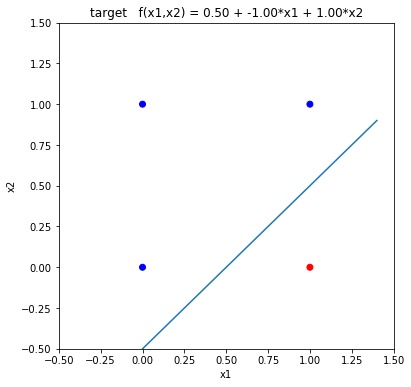

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
print(X.shape)

# adicionar uma primeira coluna de 1's em X -- X estendido
Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )
print(Xe.shape)
print(Xe)

# definir um vetor de pesos
w = np.asarray([0.5, -1, 1])

# calcular pontos que estão sobre a reta
X1,X2 = pontos_na_reta( w, 0.1 )
print('x1: ', X1, ' e x2: ', X2)

# Plotar pontos e a reta que divide o conjunto de pontos
plt.figure(figsize = (6,6))
plt.plot(X1,X2)
colors = ["blue" if valor_da_f(w, Xe[i,:])>0 else "red" for i in range(Xe.shape[0])]
plt.scatter(X[:,0], X[:,1], color=colors)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("target   f(x1,x2) = %.2f + %.2f*x1 + %.2f*x2" %(w[0],w[1],w[2]))
plt.show()

### Chutar uma hipótese inicial
Plotar o gráfico das amostras com a seguinte convenção:

Cor - ground-truth (definido pela função target acima): <font color="blue">positivo</font> e <font color="red">negativo</font>  
marca o - classificados corretamente pela hipótese<br>
marca x - classificados incorretamente pela hipótese<br>


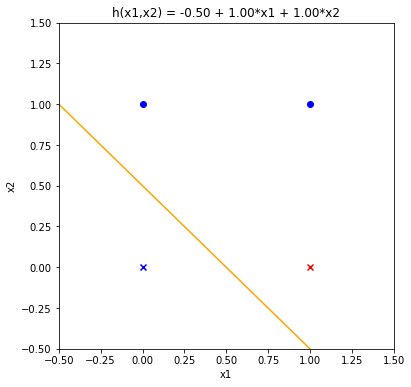

In [3]:
# Dada uma hipótese qualquer, se o sinal coincidir com o original,
# desenha-se bola, se não coincidir, desenha-se x. A cor identifica a classificação correta (ground-truth)

# vetor de pesos para a hipótese inicial
wtil = np.asarray([-0.5, 1 , 1])

# mesma coisa feita acima: calcular pontos na reta definida por esse vetor de pesos
X1,X2 = pontos_na_reta( w, 0.1 )
X1til, X2til = pontos_na_reta(wtil, 0.1)

# mesmo plot acim, porém agora será plotada a hipótese e identificando
# quais pontos estão sendo classificados errado por ela

plt.figure(figsize = (6,6))
# plota a reta chutada
plt.plot(X1til,X2til,c="orange")

# plota com 'o', vermelha ou azul, os pontos onde target e hipótese concordam
# e com 'x' onde elas discordam
colors = ["blue" if valor_da_f(w, Xe[i,:])>0 else "red" for i in range(Xe.shape[0])]
markers = ['o' if sign_da_f(valor_da_f(w, Xe[i,:]))==sign_da_f(valor_da_f(wtil, Xe[i,:])) else 'x' for i in range(Xe.shape[0])]
for _x, _y, _c, _m in zip(X[:,0], X[:,1], colors, markers):
    plt.scatter(_x, _y, marker=_m, color=_c)
    
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("h(x1,x2) = %.2f + %.2f*x1 + %.2f*x2" %(wtil[0],wtil[1],wtil[2]))
plt.show()

# O algoritmo perceptron

### Algoritmo
Itera-se sobre o conjunto de amostras, circularmente. 
Sempre que a hipótese atribui sinal errado a uma amostra, atualiza-se o peso da hipótese: se o sinal correto deveria ser positivo, então soma-se as coordenadas da amostra ao vetor peso; se o sinal deveria ser negativo, subtrai-se as coordenadas da amostra do vetor peso.
Esse processo deve ser continuado, sempre usando o vetor de pesos atualizado, de amostra em amostra. O processo termina quando, ao passar por todas as amostras do dataset com a hipótese atual, nenhum update de pesos ocorre; é a indicação de que o processo convergiu (a hipótese está classificando corretamente todas as amostras).

Para fazer uma animação desse processo, pode-se usar Dynamic ploting 
(veja por exemplo https://github.com/anujgupta82/Musings/blob/master/Dynamic%20or%20Live%20update%20of%20a%20Plot.ipynb) -- convém não fazer animação para dataset muito grande ...

<font color="red">Note que esse algoritmo só converge se os dados são linearmente separáveis.</font>

In [4]:
# Escreva aqui o seu código do algoritmo PERCEPTRON
# Mostre ao menos um plot do resultado final (pontos, target e hipótese final)
# O entendimento do processo pode ser incrmentado com uma animação ou impressão de outras
# informações relacionadas ao processo de treinamento



O algoritmo do perceptron se baseia na atualização dos pesos, e para isso, iremos definir algumas funções auxiliares. Primeiro, a função _update_, que realiza a atualização dos pesos, com a regra dada por:

%%latex
\begin{align}
w(t + 1) = w(t) + y(t)x(t)
\end{align}

In [5]:
def update(w, x, y, i):
    '''
    Atualiza o vetor de pesos. Recebe vetores w e x.
    '''
    return w + np.multiply(y[i], x[i])

A função principal do algoritmo, será:

In [6]:
def perceptron(w_T, x, y):
    '''
    Algoritmo do perceptron. Recebe vetores w_T (transposto) e x.
    Plota os gráficos ao fim das atualizações. Foi definido um número de steps.
    '''
    steps = 10
    n = len(x)
    while (steps > 0):
        for i in range(n):
            h_x = float(valor_da_f(w_T, x[i]))
            sign = True if (h_x > 0 and y[i] > 0) or (h_x < 0 and y[i] < 0) else False 
            if sign:
               continue
            else:
                w_T = update(w_T, x, y, i)
                x_axis, y_axis = pontos_na_reta(w_T, 0.1)
                plot(6, x_axis, y_axis, x, w_T)
        steps -= 1
    return w_T

A função _perceptron_ itera com base em um número máximo de steps, para cada ponto da entrada. **A cada atualização, nossa reta se adequa aos pontos.**
Dado que garantimos uma entrada linearmente separável, ele sempre converge a uma solução que se ajusta ao desejado.

São passados os pontos, os pesos, e o sinal do ponto - $x$, $w$, e $y$. Computamos o valor da função, utilizando _valordaf_, e checamos se o valor computado é o esperado. Caso positivo, continuamos o processo para os demais pontos. Senão, atualizamos os pesos, e repetimos o processo um determinado número de vezes.

A nossa hipótese $h(x)$  é computada seguindo a equação:

%%latex
\begin{align}
h(x) = sign(w^T \cdot x)
\end{align}

A nossa função _run_ tem o papel de passar os dados e vetor de pesos para o _perceptron_, sendo os pesos iniciados com **valores aleatórios**. Os pontos utilizados são a princípio, os mesmos dos exemplos.

Devemos perceber que pelo fato da inicialização dos pesos ser aleatória, a reta devolvida pelo _perceptron_ não será a mesma a cada chamada da função, afinal, as iterações levam em conta o primeiro estado do vetor $w$. 

In [7]:
def run(x, y):
    '''
    Recebe matrix x e vetor y, com os dados e os outputs, rescpectivamente.
    Retorna a linha adequada para plotar.
    '''
    w_T = np.random.rand(1,len(x[0]))
    perceptron(w_T[0], x, y)
    

Agora, iremos elaborar a função _plot_. Iremos utilizá-la para condesar os plots. 

In [8]:
def plot(size, x_axis, y_axis, data, weights):
    '''
    Plota o gráfico para as entradas. Size representa o tamanho da imagem, x e y axis, os pontos nos
    eixos, data são os próprios dados (pontos) e weights, os pesos que configuram a reta
    '''
    plt.figure(figsize = (size,size))  
    plt.plot(x_axis, y_axis)
    n = len(data)
    
    x1, x2 = [], []
    for i in range(n):
        x1.append(data[i][1])
        x2.append(data[i][2])
    
    colors = ['#2be22b' if valor_da_f(weights, data[i,:])>0 else '#d33321' for i in range(data.shape[0])]
    plt.scatter(data[:,1], data[:,2], color=colors)
    
    plt.grid(True)
    
    plt.axis([-0.5,1.4,-0.5,1.4])
    plt.xlabel('Eixo x')
    plt.ylabel('Eixo y')
    plt.title("Hipótese h(x) = %.2f + %.2f*x1 + %.2f*x2" %(weights[0],weights[1],weights[2]))
    plt.draw()

Agora, a função _main_ é construída. Nela, geramos os dados, que podem ser recebidos como argumento, e passamos para a função _run_.

In [9]:
def main(data=np.asarray([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]), y=np.asarray([1,1,-1,1])):
    run(data, y)

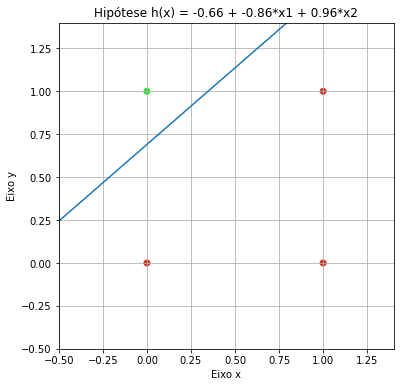

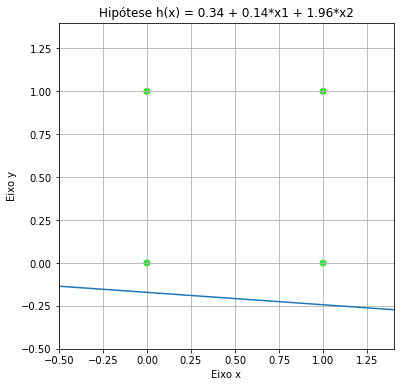

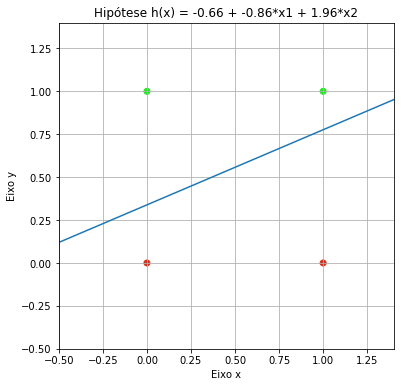

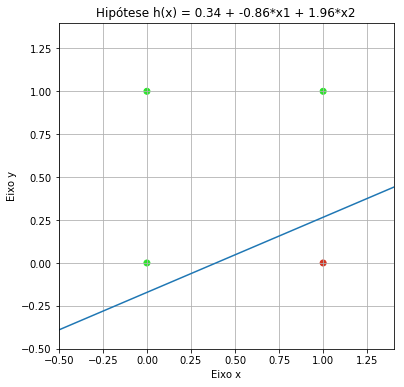

In [10]:
main()

Observamos que o algoritmo funciona da maneira desejada.